# Imports

In [88]:
import pandas as pd
import numpy as np

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Data Viz
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

1. Define a function named get_lower_and_upper_bounds that has two arguments: 
- The first argument is a pandas Series. 
- The second argument is the multiplier, which should have a default argument of 1.5.

In [4]:
def get_lower_and_upper_bounds(x, multiplier=1.5):
    """
    This function return the upper and lower bounds of a series based on the IQR
    the multiplier is set to default ar 1.5 if not value is specified
    """
    
    #get q1 and q2
    q1, q3 = x.quantile([.25, .75])
    
    #find iqr
    iqr = q3 - q1
    
    # find upper bound
    upper_bound = q3 + multiplier * iqr
    
    #find lower bound
    lower_bound = q1 - multiplier * iqr
    
    return upper_bound, lower_bound
        

1. Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?


In [19]:
def lemonade_csv():
    """This function returns a df"""

    url = "https://gist.githubusercontent.com/ryanorsinger/6af5008fa40071d8b0e064655c2886ef/raw/389449c3c96959e97e38f5b93d7d6e69d3455b6a/lemonade.csv"
    df = pd.read_csv(url, parse_dates=True)
    df.to_csv("lemonade.csv")
    return df

In [20]:
df = lemonade_csv()

In [21]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [34]:
#get upper and lower for each column (numeric)
temp_upper_bound, temp_lower_bound = get_lower_and_upper_bounds(x= df.Temperature, multiplier=1.5)
rain_upper_bound, rain_lower_bound = get_lower_and_upper_bounds(x= df.Rainfall, multiplier=1.5)
flyers_upper_bound, flyers_lower_bound = get_lower_and_upper_bounds(x= df.Flyers, multiplier=1.5)
price_upper_bound, price_lower_bound = get_lower_and_upper_bounds(x= df.Price, multiplier=1.5)
sales_upper_bound, sales_lower_bound = get_lower_and_upper_bounds(x= df.Sales, multiplier=1.5)

In [37]:
df["temp_upper_bound"] = df.Temperature >= temp_upper_bound
df["temp_lower_bound"] = df.Temperature <= temp_lower_bound
df["rain_upper_bound"] = df.Rainfall >= rain_upper_bound
df["rain_lower_bound"] = df.Rainfall <= rain_lower_bound
df["flyers_upper_bound"] = df.Flyers >= flyers_upper_bound
df["flyers_lower_bound"] = df.Flyers <= flyers_lower_bound
df["price_upper_bound"] = df.Price >= price_upper_bound
df["price_lower_bound"] = df.Price <= price_lower_bound
df["sales_upper_bound"] = df.Sales >= sales_upper_bound
df["sales_lower_bound"] = df.Sales <= sales_lower_bound

In [49]:
df.temp_upper_bound.mean() * 100

0.273972602739726

In [50]:
df.temp_lower_bound.mean() * 100

0.273972602739726

In [51]:
df["rain_upper_bound"].mean() * 100

7.671232876712329

In [52]:
df["rain_lower_bound"].mean() * 100

0.0

In [53]:
df["flyers_upper_bound"].mean() * 100

1.095890410958904

In [54]:
df["flyers_lower_bound"].mean() * 100

0.273972602739726

In [55]:
df["price_upper_bound"].mean() * 100

100.0

In [56]:
df["price_lower_bound"].mean() * 100

100.0

In [58]:
df["sales_upper_bound"].mean() * 100

1.095890410958904

In [59]:
df["sales_lower_bound"].mean() * 100

0.0

In [60]:
df[df.temp_lower_bound == True]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_upper_bound,temp_lower_bound,rain_upper_bound,rain_lower_bound,flyers_upper_bound,flyers_lower_bound,price_upper_bound,price_lower_bound,sales_upper_bound,sales_lower_bound
364,12/31/17,Sunday,15.1,2.5,9,0.5,7,False,True,True,False,False,False,True,True,False,False


In [62]:
df.Temperature.mean()

61.22465753424662

In [63]:
df.Temperature.mode()

0    55.9
dtype: float64

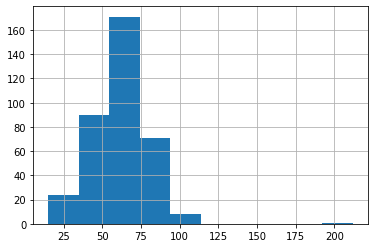

In [67]:
df.Temperature.hist()

In [68]:
#get upper and lower for each column (numeric)
temp_upper_bound, temp_lower_bound = get_lower_and_upper_bounds(x= df.Temperature, multiplier=3)
rain_upper_bound, rain_lower_bound = get_lower_and_upper_bounds(x= df.Rainfall, multiplier=3)
flyers_upper_bound, flyers_lower_bound = get_lower_and_upper_bounds(x= df.Flyers, multiplier=3)
price_upper_bound, price_lower_bound = get_lower_and_upper_bounds(x= df.Price, multiplier=3)
sales_upper_bound, sales_lower_bound = get_lower_and_upper_bounds(x= df.Sales, multiplier=3)

# df["temp_upper_bound_3"] = df.Temperature >= temp_upper_bound
# df["temp_lower_bound_3"] = df.Temperature <= temp_lower_bound
# df["rain_upper_bound_3"] = df.Rainfall >= rain_upper_bound
# df["rain_lower_bound_3"] = df.Rainfall <= rain_lower_bound
# df["flyers_upper_bound_3"] = df.Flyers >= flyers_upper_bound
# df["flyers_lower_bound_3"] = df.Flyers <= flyers_lower_bound
# df["price_upper_bound_3"] = df.Price >= price_upper_bound
# df["price_lower_bound"] = df.Price <= price_lower_bound
# df["sales_upper_bound"] = df.Sales >= sales_upper_bound
# df["sales_lower_bound"] = df.Sales <= sales_lower_bound

In [71]:
(df.Temperature >= temp_upper_bound).mean()


0.0027397260273972603

In [72]:
(df.Temperature <= temp_lower_bound).mean()

0.0

In [73]:
(df.Rainfall >= rain_upper_bound).mean()

0.010958904109589041

In [74]:
(df.Rainfall <= rain_lower_bound).mean()

0.0

In [76]:
(df.Flyers >= flyers_upper_bound).mean()

0.0

In [77]:
(df.Flyers <= flyers_lower_bound).mean()

0.0027397260273972603

In [79]:
(df.Price >= price_upper_bound).mean()

1.0

In [81]:
(df.Price <= price_lower_bound).mean()

1.0

In [82]:
(df.Sales >= sales_upper_bound).mean()

0.010958904109589041

In [83]:
(df.Sales <= sales_lower_bound).mean()

0.0

In [90]:
def numeric_hists(df, bins=20):
    """
    Function to take in a DataFrame, bins default 20,
    select only numeric dtypes, and
    display histograms for each numeric column
    """
    plt.rc('figure', figsize=(11, 9))
    plt.rc('font', size=13)
    num_df = df.select_dtypes(include=np.number)
    num_df.hist(bins=bins, color='thistle')
    plt.suptitle('Numeric Column Distributions')
    plt.show()

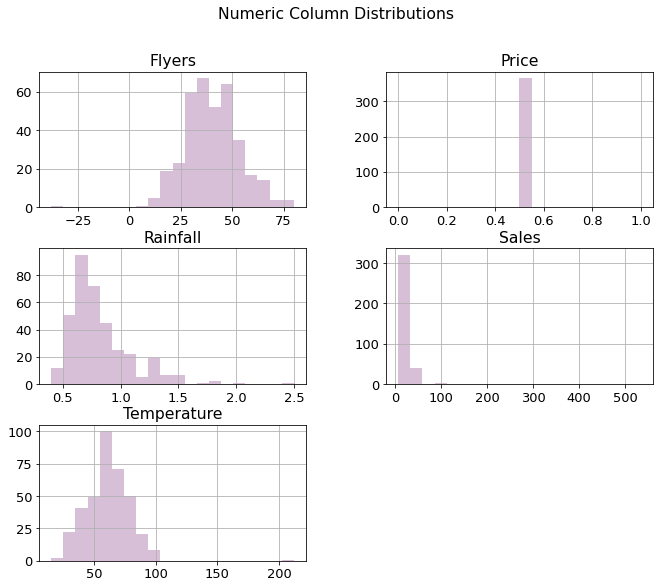

In [91]:
numeric_hists(df, bins=20)